<center><h1>BUSS6002 - Data Science in Business</h1></center>

#### Pre-Tutorial Checklist

1. Complete Tasks 1 and 2 from week 7
2. Read “Polynomial Regression”


# Tutorial 9 - Model Selection

## Polynomial Regression (Reminder)

In week 6 we saw how to build a linear regression model, which in the case of a multiple linear regression with two features takes the form:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

As the name suggests, these algorithms are very good at modeling linear functions, that is functions where each feature is multiplied by a constant weight $\beta$. One downside of these models is that any nonlinearities in the relationship between features and target might be missed. Nonlinearities are terms in our model function where feature variables are multiplied together (e.g. $\beta_{i} x_1 x_2$), or where a feature is raised to a power (e.g. $\beta_{i} x_1^2$). A polynomial of order 3 is a polynomial where the highest power is 3, e.g:

$$y = \beta_0 + \beta_1 x_1 + \beta_{2} x_1^2 + \beta_{3} x_1^3$$

We can easily account for nonlinearities in our model by creating new features which multiply two feature columns together (e.g. $x_3 = x_1x_2$) or raise a feature column to a power (e.g. $x_3 = x_1^2$). This allows us to model any multivariate polynomial function using the Ordinary Least Squares method.

### Polynomial Regression Example

Let's create a simple dataframe to demonstrate polynomial regression.

In [1]:
import pandas as pd

df = pd.DataFrame({'Sqft': [1200,1350,1050], 'Price': [125000,160000,95000]})

df.head()

,Sqft,Price
0,1200,125000
1,1350,160000
2,1050,95000


Now say we want to create a polynomial model of degree 2 for predicting house prices using Sqft. The model looks like:

$$y = \beta_0 + \beta_1 x_1 + \beta_{2} x_1^2$$

Where x_1 represents the values in the `Sqft` column. Creating the $x_1^2$ column is straightforward:

In [2]:
df['Sqft^2'] = df['Sqft']**2

df.head()

,Sqft,Price,Sqft^2
0,1200,125000,1440000
1,1350,160000,1822500
2,1050,95000,1102500


Now if we use these features to create a multivariate regression model, as in week 6, our model will include a Sqft$^2$ term and a corresponding weight $\beta_{11}$.

## Training and Test Sets

To select the "best" model for a machine learning task we need to evaluate the performance of each model. The first step in this process is seperating the data into training and test sets. Usually we take 70% of our collected data as the training set and the remaining 30% as our test set.

**Training Set**: This set is used to train our models on. In other words we estimate the parameters for the models using this data.

**Test Set**: This set is used ONLY to estimate the future predictive performance of the chosen model. The test set should never be used for training in any way whatsoever. It needs to remain completely independant and unseen by the models.

The data in the test set must be distributed the same as the training set and also the same as future data. You might get unlucky in splitting your data and select lots of outliers. This can be addressed by collecting more data.

<img src="img/train_test.png" width=500>

#### Train/Test Splitting in Python

scikit learn has a train_test_split function that will split the data into random train and test sets

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - train_test_split</h3></div>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

house_prices = pd.read_excel("BatonRouge.xls")

target_y = house_prices['Price']
features_x = house_prices.loc[:, house_prices.columns != 'Price']

X_train, X_test, Y_train, Y_test = train_test_split(features_x, target_y, test_size=0.3)

## Evaluation Using the Training Set

Since the Test set is off limits for the purposes of training and evaluation we must use the remaining data, which is the training set.

### Holdout

The Holdout method simply reserves a portion of the training data as a Validation Set. The models are trained on the training set and the model performance is compared on the Validation Set.

<img src="img/holdout.png" width=500>

### Cross Validation

The Holdout method is limited by the fact that the validation set is quite small. This means the validation set has a low chance of reflecting the full distribution of future data.

To resolve this we can use all the training data as validation data. We successively partition the training set into different training and validation pairs. Performance is evaluated on all pairs and a sumamry statistic of accuracy (mean or median) is calculated.

Cross Validation is an excellent estimator of "out of sample" performance. There are many types of Cross Validation such as "leave-p-out", "leave-one-out" and "k-fold". We will focus on k-fold cross validation. K refers to the number of splits of data. In the figure below there are 5 folds.

<img src="img/cross_val.png" width=800>


## Tuning Hyper Parameters

Some models/algorithms will have additional parameters called hyper parameters. Hyper parameters are set before the parameter estimation process. Some common examples are regularisation parameters (control the magnitude of parameter values), learning rate or step size (gradient descent) or the number of neurons in a layer of a neural network.

The optimal value of these parameters is hard to guess so you should always use cross validation to find the best parameter values. 

## Process

1. For each model, tune hyper parameters using cross validation on training set
2. Perform cross validation on training set using each model to see which has the best predictive performance on average
3. Estimate selected model performance using test set

For step 1 the process is independant for each model. For step 2 we must use the same process i.e. validation or cross validation splits so that we conduct a fair test.

Cross Validation mirrors test performance (out of sample generalisation) so we expect that the model that performs best in CV will perform best in the test set. From the test set we get an unbiased estimate of the performance on future data.

<img src="img/model_selection.png" width=900>


## Why is Validation Required?

Why is a Validation set required?

1. Selecting a model based on training set performance leads to a model that does not generalise to unseen data. In other words it leads to overfitting.
2. Using the test set as a validation set means that we no longer have an independant set to evaluate out of sample performance. The test set becomes tainted.

### Example

Lets create a synthetic dataset with a training and a single validation set to see which set we should used to select our model.

The data comes from the following function

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

We will evaluate the following models

$f(x) = \beta_0 + \beta_1 x $

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 $

Up to

$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_9 x^9 $

Theoretically a high order polynomial can represent any function. **So the highest order should be the best model right? NO!**

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Initialise RNG, so we get same result everytime
np.random.seed(0)

# Number of training points
m = 50

x = np.linspace(-1, 1.0, m)

def calc_polynomial(x, beta0 = 4, beta1 = 1.5, beta2 = 3.2, beta3 = 3):
    return beta0 + beta1 * x + beta2 * np.power(x,2) + beta3 * np.power(x,3)
 
# f values from 3rd order polynomial
f = calc_polynomial(x)

$f$ contains data perfectly sampled along the 2nd order polynomial. In the real world we usually observe data that is noisy. So we will add a small amount of Gaussian noise to the data

In [5]:
# Generate noisy sample from population
sigma2 = 0.3

x_train = np.random.uniform(-1, 1, m)
y_train = calc_polynomial(x_train) + np.random.normal(0, np.sqrt(sigma2), m)

x_validation = np.random.uniform(-1, 1, m)
y_validation = calc_polynomial(x_validation) + np.random.normal(0, np.sqrt(sigma2), m)

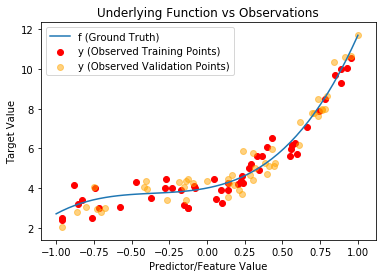

In [6]:
fig1 = plt.figure()

plt.plot(x, f, label = "f (Ground Truth)")
plt.scatter(x_train, y_train, label = "y (Observed Training Points)", color = "red")
plt.scatter(x_validation, y_validation, label = "y (Observed Validation Points)", color = "orange", alpha = 0.5)

plt.xlabel("Predictor/Feature Value")
plt.ylabel("Target Value")
plt.title("Underlying Function vs Observations")
plt.legend(loc="upper left")

plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - PolynomialFeatures</h3></div>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.polynomialfeatures.html

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

max_deg = 20

train_error = list()
validation_error = list()

for i in range(1, max_deg):
    
    poly_transformer = PolynomialFeatures(i) 
    poly_x_train = poly_transformer.fit_transform(x_train.reshape(-1,1))
    poly_x_valid = poly_transformer.fit_transform(x_validation.reshape(-1,1))
    
    # Create the linear regression object
    lin_reg = LinearRegression()

    # Estimate coefficients
    lin_reg.fit(poly_x_train, y_train)
    
    # Calculate predictions for training set
    y_pred_train = lin_reg.predict(poly_x_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_error.append(mse_train)
    
    # Calculate predictions for validation set
    y_pred_validation = lin_reg.predict(poly_x_valid)
    mse_valid = mean_squared_error(y_validation, y_pred_validation)
    validation_error.append(mse_valid)

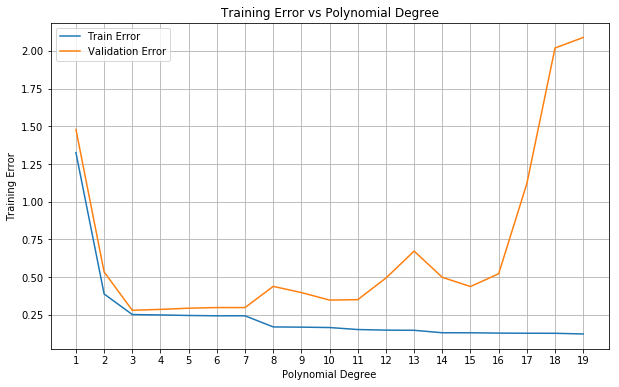

In [8]:
# Plot training and validation error
fig4 = plt.figure(figsize = (10, 6))

plt.plot(np.arange(1, max_deg, 1), train_error, label = "Train Error")
plt.plot(np.arange(1, max_deg, 1), validation_error, label = "Validation Error")

plt.title('Training Error vs Polynomial Degree')
plt.xlabel("Polynomial Degree")
plt.ylabel("Training Error")

plt.xticks(np.arange(1, max_deg))

plt.legend()
plt.grid()

plt.show()

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise  1 - Learning Curve</h3></div>

1. Which model would we select based on the training error?
2. Which model would we select based on validation error?
3. Of your chosen models (best training, best validation), which model is expected to generalise better on new data?
4. What conclusion can you draw from this?

## Example: Using CV to Tune Hyperparameters

Using the earlier dataset we will build another regression model: KNN Regression.

KNN Regression predicts the target value by averaging the $k$ nearest training observations. Therefore $k$ is a hyper parameter that we should optimise.

#### Manual Hyperparameter Search

In [21]:
# Manual K-Folds
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

cv_scores = []

k_values = np.arange(1,11)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)

    # This returns a "greater is better" version of MSE
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    scores = cross_val_score(knn, x_train.reshape(-1, 1), y_train, cv = 3)
    
    # Get the mean of the scores from the 3 folds
    cv_score = np.mean(scores)
    
    cv_scores.append(cv_score)
    
print("Best value of k: {0}".format(k_values[np.argmax(cv_scores)]))

Best value of k: 2


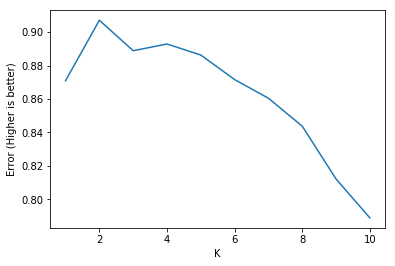

In [23]:
fig = plt.figure()

plt.plot(k_values, cv_scores)

plt.xlabel("K")
plt.ylabel("Error (Higher is better)")

plt.show()

#### Grid Search

In [24]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the grid of parameters to search (in this case its 1 dimensional)
param_grid = {
    'n_neighbors': np.arange(1,11),
}

model = KNeighborsRegressor()

# Create the grid search object
grid_cv_obj = GridSearchCV(model, param_grid, return_train_score=True, cv = 5)

# Do the grid search
grid_cv_obj.fit(x_train.reshape(-1, 1), y_train)

print("Grid Search CV Complete!")

Grid Search CV Complete!


In [25]:
# Get the best model
best_model = grid_cv_obj.best_estimator_

# Print the best model
print(best_model)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


In [26]:
# Print the best params
print(grid_cv_obj.best_params_)

{'n_neighbors': 2}


In [27]:
import pandas as pd

results = pd.DataFrame(grid_cv_obj.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000241,0.000051,0.000594,0.000115,1,{'n_neighbors': 1},0.945760,0.896010,0.910837,0.928709,...,0.800549,0.240143,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000183,0.000003,0.000487,0.000007,2,{'n_neighbors': 2},0.963866,0.927800,0.930220,0.891689,...,0.865100,0.128632,1,0.967237,0.965592,0.978455,0.970519,0.984990,0.973359,0.007309
2,0.000197,0.000019,0.000499,0.000013,3,{'n_neighbors': 3},0.952795,0.944617,0.935083,0.889370,...,0.862181,0.138324,2,0.959659,0.958393,0.963310,0.967538,0.978551,0.965490,0.007265
3,0.000198,0.000022,0.000520,0.000055,4,{'n_neighbors': 4},0.938433,0.966842,0.924874,0.886193,...,0.839076,0.181882,4,0.954663,0.946369,0.953357,0.960792,0.968826,0.956801,0.007560
4,0.000184,0.000008,0.000486,0.000008,5,{'n_neighbors': 5},0.930500,0.981964,0.905384,0.909697,...,0.844271,0.177332,3,0.947170,0.936398,0.940139,0.959811,0.968890,0.950482,0.012184


#### Understanding Grid Search

In this example we only had one parameter so the grid is just a 1 dimensonal list. GridSearchCV performs cross validation for each value of n_neighbours and returns the best value of n_neighbours.

We can use the ParameterGrid object in sklearn to list out all combinations of values that will be checked. In this case there are only 10.

In [28]:
from sklearn.model_selection import ParameterGrid

grid_df = pd.DataFrame(list(ParameterGrid(param_grid)))
                       
grid_df

,n_neighbors
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


If we add another parameter then the number of parameter combinations that we have to search increases dramatically. We perform cross validation for each row in the parameter grid. Here I have shown the first 13 rows from 1000 ($10 \times 10 \times 10$) total rows.

In [29]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'param_a': np.arange(1,11),
    'param_b': np.arange(100,111),
    'param_c': np.arange(-5,6),
}

grid_df = pd.DataFrame(list(ParameterGrid(param_grid)))
                       
grid_df.head(13)

,param_a,param_b,param_c
0,1,100,-5
1,1,100,-4
2,1,100,-3
3,1,100,-2
4,1,100,-1
5,1,100,0
6,1,100,1
7,1,100,2
8,1,100,3
9,1,100,4


## Example: Using CV to Compare Model Performance

Lets compare the performance of our best polynomial model with that of the knn regressor.

To ensure that each model sees the exact same K-Folds we need to store the K-Fold split in to a Python object and then share it to the cross_val_score function

In [17]:
# Build poly2 model
poly_transformer = PolynomialFeatures(2) 
poly_x = poly_transformer.fit_transform(np.reshape(x_train, (-1,1)))
poly_reg = LinearRegression()
poly_reg.fit(poly_x, y_train)
    
# Build knn model
knn = KNeighborsRegressor(n_neighbors= 4)
knn.fit(x_train.reshape(-1,1), y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [30]:
from sklearn.model_selection import KFold

# 3-Fold Cross Validation
kf = KFold(3)

poly_scores = cross_val_score(poly_reg, poly_x, y_train, cv = kf)
poly_mean = np.mean(poly_scores)

knn_scores = cross_val_score(knn, x_train.reshape(-1,1), y_train, cv = kf)
knn_mean = np.mean(knn_scores)

In [31]:
# Make the results pretty

data = [
    {"Model": "Polynomial Regression", "CV MSE": poly_mean},
    {"Model": "KNN Regressor", "CV MSE": knn_mean}
]

results = pd.DataFrame(data)
results = results.set_index("Model")
results

,CV MSE
Model,
Polynomial Regression,0.879979
KNN Regressor,0.788908


## Optional: Manual K-Fold Cross Validation

The following code demonstrates what is happening when we use the cross_val_score function

In [20]:
# Manual K-Folds
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

cv_scores = []

k_values = np.arange(1,11)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    
    kf = KFold(3)
    
    scores = []
    
    for train_indices, valid_indices in kf.split(x):
        x_cvtrain = x_train[train_indices]
        x_cvvalid = x_train[valid_indices]
        
        y_cvtrain = y_train[train_indices]
        y_cvvalid = y_train[valid_indices]
        
        knn.fit(x_cvtrain.reshape(-1,1), y_cvtrain)
        
        y_cvpred = knn.predict(x_cvvalid.reshape(-1,1))
        
        error = -(mean_squared_error(y_cvvalid, y_cvpred))
        
        scores.append(error)
        
    # Get the mean of the scores from the 3 folds
    cv_score = np.mean(scores)
    
    cv_scores.append(cv_score)
    
print("Best value of k: {0}".format(k_values[np.argmax(cv_scores)]))

Best value of k: 2
